NAME - VAIBHAV SHRIVASTAV <br>
ASUID - 1229620381

In [312]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

#1. Load the data from the npz file. The file contains a data in a dictionary format. Use a key ‘data’ to
retrieve a matrix. The type of the matrix should be the NumPy array and the shape should be (300,
2) (i.e., 300 data instances).

In [313]:
X = np.load('pca_data.npz')['data']

In [314]:
X.shape

(300, 2)

#2. [1pt] Use PCA from scikit-learn to compute two principal components. Report the computed principal
components. There could be two different answers for this. One from scaled data and another from
the raw data (non-scaled). Either is okay.

In [315]:
#Scale Data
# X = preprocessing.scale(X.T)
# std_scaler = StandardScaler()
# scaled_x = std_scaler.fit_transform(X)
# scaled_x.mean(), scaled_x.std()
unscaled_x = X

In [316]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(unscaled_x)
#Components using sklearn
pca.components_, pca.mean_[0], pca.mean_[1], pca.explained_variance_ratio_

(array([[-0.83774478, -0.54606197],
        [-0.54606197,  0.83774478]]),
 4.9020863638048855,
 4.915293406481235,
 array([0.86017232, 0.13982768]))

Text(0.5, 1.0, 'Plot using PCA through Pandas')

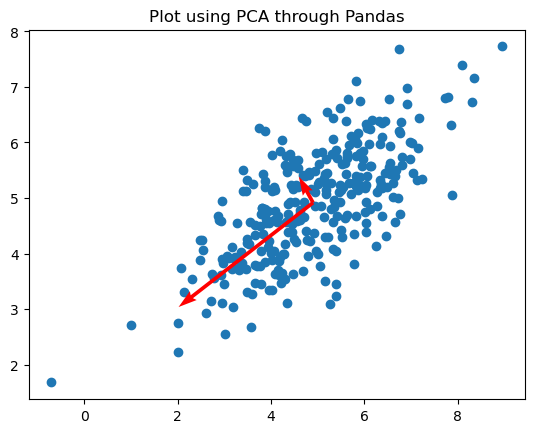

In [317]:
#components_ = direction
#lengths = explained_variance_
#centered around the mean
plt.scatter(unscaled_x[:,0], unscaled_x[:,1])
origin = pca.mean_[0], pca.mean_[1]
plt.quiver([pca.mean_[0]], [pca.mean_[1]], pca.components_[0,0]*pca.explained_variance_ratio_[0]*4, pca.components_[0,1]*pca.explained_variance_ratio_[0]*4, color = ['r'], scale = 1, scale_units = 'xy', angles = 'xy')
plt.quiver([pca.mean_[0]], [pca.mean_[1]], pca.components_[1,0]*pca.explained_variance_ratio_[1]*4, pca.components_[1,1]*pca.explained_variance_ratio_[1]*4, color = ['r'], scale = 1, scale_units = 'xy', angles = 'xy')
plt.title('Plot using PCA through Pandas')

3. [3pts] Implement your own version of PCA algorithm without using scikit-learn API (again, either
scaled or non-scaled is okay, but make sure you use the same setting with the above experiment so that
you can make direct comparisons).

In [318]:
# Compute the covariance matrix
cov_matrix = np.cov(unscaled_x, rowvar=False)

#finding eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors based on eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top k eigenvectors (number of components=2 in this case)
n_components = 2
top_n_eigenvectors = eigenvectors[:, :n_components]

# Project the data onto the top k eigenvectors
principal_components_custom = np.dot(unscaled_x, top_k_eigenvectors)

#explained_variance_ratio
explained_variance_ratio = eigenvalues/np.sum(eigenvalues)

print("\nPrincipal components from non-scaled data (custom PCA):")
top_n_eigenvectors, explained_variance_ratio


Principal components from non-scaled data (custom PCA):


(array([[ 0.83774478, -0.54606197],
        [ 0.54606197,  0.83774478]]),
 array([0.86017232, 0.13982768]))

4. [1pt] Produce a plot with data instances and computed principal components.
• for plotting the data instances, use either “plot” or “scatter” of Matplotlib.
• for plotting the principal components, use “quiver”. Plot two arrows that are centered around
mean, in the direction of principal components, and of lengths proportional to explained variance.
An example is shown below. To obtain the information on the mean, the principal component
directions, and the explained variances, you will have to read the scikit-learn document carefully.
(See the example below).

Text(0.5, 1.0, 'Plot using PCA through numpy')

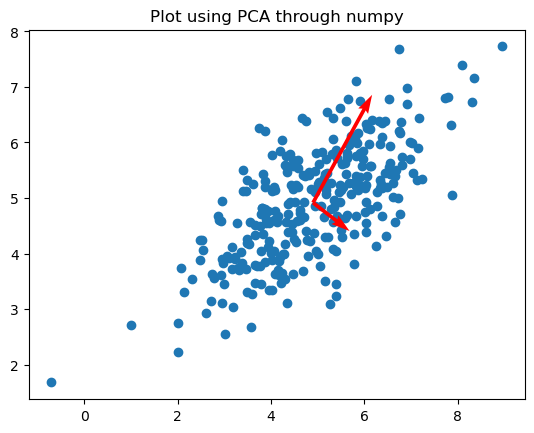

In [319]:
#Plot using Computed PCA through numpy.
plt.scatter(unscaled_x[:,0], unscaled_x[:,1])
plt.quiver(np.mean(unscaled_x[:,0]), np.mean(unscaled_x[:,1]), top_n_eigenvectors[0,0]*np.sqrt(explained_variance_ratio[1])*2.5, top_n_eigenvectors[0,1]*np.sqrt(explained_variance_ratio[1])*2.5, color = ['r'], scale = 1, scale_units = 'xy', angles = 'xy')
plt.quiver(np.mean(unscaled_x[:,0]), np.mean(unscaled_x[:,1]), top_n_eigenvectors[1,0]*np.sqrt(explained_variance_ratio[0])*2.5, top_n_eigenvectors[1,1]*np.sqrt(explained_variance_ratio[0])*2.5, color = ['r'], scale = 1, scale_units = 'xy', angles = 'xy')
plt.title('Plot using PCA through numpy')